## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Load flights data table
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_flights_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,1.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,1.0,404.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,1.0,93.0,40.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,1.0,315.0,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [3]:
#Add month and year
flights['month'] = pd.to_datetime(flights['fl_date']).dt.month
flights['year'] = pd.to_datetime(flights['fl_date']).dt.year

In [4]:
#average monthly delay per air carrier
avg_delay_per_carrier = flights[['op_unique_carrier', 'month', 'arr_delay']].groupby(['op_unique_carrier', 'month']).mean().reset_index()
avg_delay_per_carrier

,op_unique_carrier,month,arr_delay
0,9E,1,6.270389
1,9E,2,6.496693
2,9E,3,1.094673
3,9E,4,7.428302
4,9E,5,4.653126
...,...,...,...
321,ZW,8,3.413929
322,ZW,9,6.658657
323,ZW,10,11.048519
324,ZW,11,6.678406


#### Find out distance covered monthly by different air carriers

In [5]:
#distance covered monthly by different air carriers
dist_monthly_per_carrier = flights[['op_unique_carrier', 'year', 'month', 'distance']].groupby(['op_unique_carrier', 'year', 'month']).sum().reset_index()
dist_monthly_per_carrier

,op_unique_carrier,year,month,distance
0,9E,2018,1,518203.0
1,9E,2018,2,486715.0
2,9E,2018,3,657041.0
3,9E,2018,4,580686.0
4,9E,2018,5,577405.0
...,...,...,...,...
634,ZW,2019,8,262553.0
635,ZW,2019,9,241405.0
636,ZW,2019,10,288586.0
637,ZW,2019,11,220448.0


#### Find out number of passengers that were carried by different air carriers

In [6]:
#Load passengers data
passengers = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_passengers.csv', delimiter=',', low_memory=False)
passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,6.0,6.0,223200.0,1116.0,906.0,0.0,0.0,1259.0,1044.0,918.0,...,US,United States,6,694,1,2019,12,3,F,DU
1,6.0,6.0,187200.0,936.0,861.0,0.0,0.0,1208.0,1062.0,960.0,...,US,United States,6,698,1,2019,12,3,F,DU
2,6.0,6.0,214200.0,1071.0,982.0,0.0,0.0,917.0,768.0,690.0,...,US,United States,6,694,1,2019,12,2,F,DU
3,6.0,6.0,216000.0,1080.0,775.0,0.0,0.0,598.0,582.0,492.0,...,US,United States,6,694,1,2019,12,2,F,DU
4,6.0,6.0,173222.0,0.0,0.0,173220.0,0.0,620.0,542.0,476.0,...,US,United States,6,691,2,2019,2,2,G,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350492,6.0,6.0,84000.0,420.0,387.0,0.0,0.0,436.0,756.0,467.0,...,US,United States,6,673,1,2019,12,1,F,IU
2350493,6.0,6.0,212400.0,1062.0,939.0,0.0,0.0,1041.0,1032.0,888.0,...,US,United States,6,694,1,2019,12,3,F,DU
2350494,6.0,6.0,187200.0,936.0,765.0,0.0,0.0,1049.0,1080.0,912.0,...,US,United States,6,698,1,2019,12,3,F,DU
2350495,6.0,6.0,187200.0,936.0,806.0,0.0,0.0,1208.0,1086.0,984.0,...,US,United States,6,698,1,2019,12,3,F,DU


In [17]:
#Filter to 2018-2019
passengers = passengers[(passengers['year']==2018) | (passengers['year']=='2019')]
passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
221341,0.0,1.0,2360.0,9.0,7.0,12.0,0.0,86.0,55.0,50.0,...,US,United States,4,416,1,2018,1,1,L,DU
221342,0.0,1.0,2379.0,9.0,0.0,0.0,0.0,84.0,35.0,30.0,...,US,United States,4,416,1,2018,1,1,L,DU
221343,0.0,1.0,2446.0,9.0,3.0,0.0,0.0,128.0,50.0,45.0,...,CA,Canada,4,416,1,2018,1,1,L,IU
221344,0.0,1.0,1567.0,6.0,3.0,0.0,0.0,69.0,45.0,40.0,...,US,United States,0,40,4,2018,1,1,L,DU
221345,0.0,1.0,2360.0,9.0,0.0,0.0,0.0,86.0,55.0,50.0,...,US,United States,4,416,1,2018,1,1,L,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161915,1166.0,583.0,1049400.0,5247.0,3646.0,0.0,0.0,91.0,27284.0,21338.0,...,US,United States,1,125,1,2018,7,1,F,DU
1161916,1188.0,594.0,1069200.0,5346.0,3573.0,0.0,0.0,91.0,27799.0,21740.0,...,US,United States,1,125,1,2018,7,1,F,DU
1161917,1216.0,608.0,1094400.0,5472.0,3827.0,0.0,0.0,91.0,28454.0,22253.0,...,US,United States,1,125,1,2018,8,1,F,DU
1161918,1258.0,629.0,1132200.0,5661.0,4056.0,0.0,0.0,91.0,29437.0,23021.0,...,US,United States,1,125,1,2018,8,1,F,DU


In [18]:
#number of passengers that were carried by different air carriers 2018-2019
num_pass_per_carrier = passengers[['unique_carrier', 'passengers']].groupby(['unique_carrier']).sum().reset_index()
num_pass_per_carrier

,unique_carrier,passengers
0,02Q,230.0
1,04Q,49335.0
2,07Q,11925.0
3,09Q,758524.0
4,0BQ,191.0
...,...,...
320,Z3,7046.0
321,Z3Q,27520.0
322,ZK,7528.0
323,ZW,3852854.0


#### Find out total fuel comsumption per air carrier.

In [24]:
#Load fueld consumption data table
fuel = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_fuel_consumption.csv', delimiter=',', low_memory=False)
fuel

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,20408.932432,unique_carrier_unknown,0JQ,carrier_name_unknown,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.000000,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.000000,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.000000,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.000000,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.000000,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.000000,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.000000,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.000000,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


In [25]:
#Filter to 2018-2019
fuel = fuel[(fuel['year']==2018) | (fuel['year']=='2019')]

C:\Users\Ryan\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [26]:
#total fuel comsumption per air carrier 2018-2019
fuel_per_carrier = fuel[['unique_carrier', 'total_gallons']].groupby(['unique_carrier']).sum().reset_index()
fuel_per_carrier.head()

,unique_carrier,total_gallons
0,09Q,18409760.0
1,0WQ,91567.0
2,1BQ,1278377.0
3,27Q,0.0
4,2HQ,3758441.0


#### Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [28]:
fuel_per_carrier.head()

,unique_carrier,total_gallons
0,09Q,18409760.0
1,0WQ,91567.0
2,1BQ,1278377.0
3,27Q,0.0
4,2HQ,3758441.0


In [29]:
#Merge fuel and passenger and drop nas
fuel_per_passenger = pd.merge(fuel_per_carrier, num_pass_per_carrier, how='left', on='unique_carrier')
#Drop nas
fuel_per_passenger = fuel_per_passenger.dropna()
#Drop zeros
fuel_per_passenger = fuel_per_passenger[(fuel_per_passenger != 0).all(1)]
fuel_per_passenger.head()

,unique_carrier,total_gallons,passengers
0,09Q,18409760.0,758524.0
1,0WQ,91567.0,3848.0
2,1BQ,1278377.0,223021.0
4,2HQ,3758441.0,42680.0
6,5V,4637921.0,3992.0


In [30]:
#Calc total distance per carrier from flights table with 2018-2019
dist_per_carrier = flights[['op_unique_carrier', 'distance']].groupby(['op_unique_carrier']).sum().reset_index()
dist_per_carrier.head()

,op_unique_carrier,distance
0,9E,14421490.0
1,9K,47566.0
2,AA,53973835.0
3,AS,14587569.0
4,AX,4473137.0


In [31]:
#Merge fuel_per_passenger and distance (data is all 2018-2019)
fuel_per_passenger_per_dist = pd.merge(fuel_per_passenger, dist_per_carrier, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
fuel_per_passenger_per_dist = fuel_per_passenger_per_dist.dropna()
fuel_per_passenger_per_dist = fuel_per_passenger_per_dist.drop(['op_unique_carrier'], axis=1)
fuel_per_passenger_per_dist

,unique_carrier,total_gallons,passengers,distance
7,AA,3.644229e+09,148593504.0,53973835.0
8,AS,7.268123e+08,34067799.0,14587569.0
9,B6,8.491668e+08,42254045.0,17426483.0
10,DL,3.532291e+09,152333597.0,56463971.0
11,F9,2.610978e+08,19810472.0,7560274.0
12,G4,1.914712e+08,13847451.0,5786292.0
14,HA,2.737826e+08,11637528.0,4990615.0
16,NK,4.123464e+08,29273040.0,11118601.0
17,OO,9.766412e+07,39081950.0,46625329.0
19,UA,3.445675e+09,113668262.0,36382051.0


In [32]:
# Calc average fuel comsumption per passenger per km
# Convert miles to km
fuel_per_passenger_per_dist['avg_fuel_per_pass_per_km'] = fuel_per_passenger_per_dist['total_gallons'] / fuel_per_passenger_per_dist['passengers'] / (fuel_per_passenger_per_dist['distance'] * 1.60934)
fuel_per_passenger_per_dist = fuel_per_passenger_per_dist.reset_index(drop=True)
fuel_per_passenger_per_dist

,unique_carrier,total_gallons,passengers,distance,avg_fuel_per_pass_per_km
0,AA,3.644229e+09,148593504.0,53973835.0,2.823415e-07
1,AS,7.268123e+08,34067799.0,14587569.0,9.087564e-07
2,B6,8.491668e+08,42254045.0,17426483.0,7.165841e-07
3,DL,3.532291e+09,152333597.0,56463971.0,2.551770e-07
4,F9,2.610978e+08,19810472.0,7560274.0,1.083236e-06
5,G4,1.914712e+08,13847451.0,5786292.0,1.484860e-06
6,HA,2.737826e+08,11637528.0,4990615.0,2.929161e-06
7,NK,4.123464e+08,29273040.0,11118601.0,7.872206e-07
8,OO,9.766412e+07,39081950.0,46625329.0,3.330344e-08
9,UA,3.445675e+09,113668262.0,36382051.0,5.177262e-07


In [33]:
#Calc avg delay per carrier
avg_delay_per_carrier = flights[['op_unique_carrier', 'arr_delay']].groupby(['op_unique_carrier']).mean().reset_index()
avg_delay_per_carrier.head()

,op_unique_carrier,arr_delay
0,9E,5.079317
1,9K,7.160389
2,AA,5.426766
3,AS,5.894499
4,AX,4.998606


In [34]:
#Add to fuel_per_passenger_per_dist table
fuel_per_passenger_per_dist = pd.merge(fuel_per_passenger_per_dist, avg_delay_per_carrier, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
fuel_per_passenger_per_dist

,unique_carrier,total_gallons,passengers,distance,avg_fuel_per_pass_per_km,op_unique_carrier,arr_delay
0,AA,3.644229e+09,148593504.0,53973835.0,2.823415e-07,AA,5.426766
1,AS,7.268123e+08,34067799.0,14587569.0,9.087564e-07,AS,5.894499
2,B6,8.491668e+08,42254045.0,17426483.0,7.165841e-07,B6,5.262804
3,DL,3.532291e+09,152333597.0,56463971.0,2.551770e-07,DL,5.216726
4,F9,2.610978e+08,19810472.0,7560274.0,1.083236e-06,F9,5.050841
5,G4,1.914712e+08,13847451.0,5786292.0,1.484860e-06,G4,5.253797
6,HA,2.737826e+08,11637528.0,4990615.0,2.929161e-06,HA,5.813900
7,NK,4.123464e+08,29273040.0,11118601.0,7.872206e-07,NK,5.339712
8,OO,9.766412e+07,39081950.0,46625329.0,3.330344e-08,OO,5.562292
9,UA,3.445675e+09,113668262.0,36382051.0,5.177262e-07,UA,5.504916


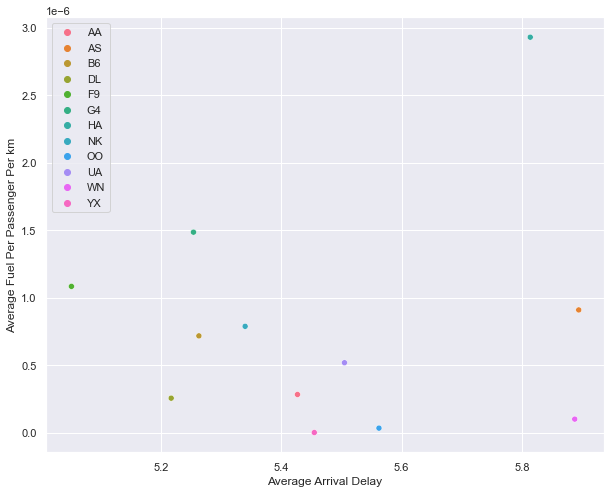

In [44]:
#Plot data to see if there is a relationship
fig = sns.scatterplot(data=fuel_per_passenger_per_dist, x="arr_delay", y="avg_fuel_per_pass_per_km", hue="unique_carrier")
#sns.set(rc={'figure.figsize':(10,8)})
fig.set(xlabel='Average Arrival Delay', ylabel='Average Fuel Per Passenger Per km')
plt.legend(loc='upper left')
#fig.set_ylim(0,0.3E-5)
plt.show()

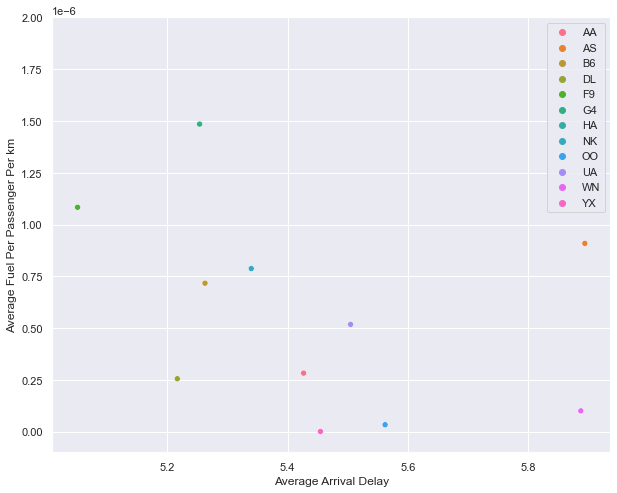

In [45]:
#Rescale y-axis to exclude high data point
fig = sns.scatterplot(data=fuel_per_passenger_per_dist, x="arr_delay", y="avg_fuel_per_pass_per_km", hue="unique_carrier")
fig.set(xlabel='Average Arrival Delay', ylabel='Average Fuel Per Passenger Per km')
plt.legend(loc='upper right')
fig.set_ylim(-0.1E-6,2E-6)
plt.show()

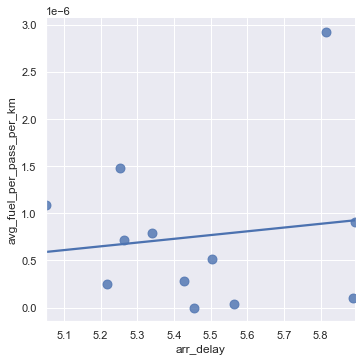

In [46]:
#Best fit line with all data points
sns.lmplot(data=fuel_per_passenger_per_dist, x="arr_delay", y="avg_fuel_per_pass_per_km", ci=None, scatter_kws={"s": 80});

In [47]:
# View table
fuel_per_passenger_per_dist

,unique_carrier,total_gallons,passengers,distance,avg_fuel_per_pass_per_km,op_unique_carrier,arr_delay
0,AA,3.644229e+09,148593504.0,53973835.0,2.823415e-07,AA,5.426766
1,AS,7.268123e+08,34067799.0,14587569.0,9.087564e-07,AS,5.894499
2,B6,8.491668e+08,42254045.0,17426483.0,7.165841e-07,B6,5.262804
3,DL,3.532291e+09,152333597.0,56463971.0,2.551770e-07,DL,5.216726
4,F9,2.610978e+08,19810472.0,7560274.0,1.083236e-06,F9,5.050841
5,G4,1.914712e+08,13847451.0,5786292.0,1.484860e-06,G4,5.253797
6,HA,2.737826e+08,11637528.0,4990615.0,2.929161e-06,HA,5.813900
7,NK,4.123464e+08,29273040.0,11118601.0,7.872206e-07,NK,5.339712
8,OO,9.766412e+07,39081950.0,46625329.0,3.330344e-08,OO,5.562292
9,UA,3.445675e+09,113668262.0,36382051.0,5.177262e-07,UA,5.504916


In [48]:
#Remove one high datapoint
fuel_per_passenger_per_dist_updated = fuel_per_passenger_per_dist.drop(6)

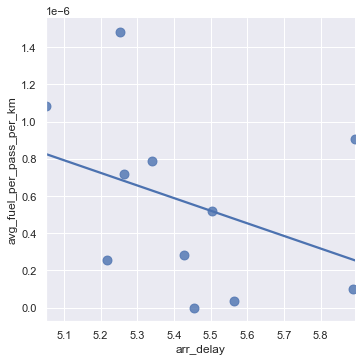

In [49]:
#Best fit plot with w/o high data point
sns.lmplot(data=fuel_per_passenger_per_dist_updated, x="arr_delay", y="avg_fuel_per_pass_per_km", ci=None, scatter_kws={"s": 80});

### Summary
- There appears to potentially be some trend between "average Fuel Per Passenger Per km" vs. "Average Arrival Delay" by carrier
- Carriers with a lower average arrival delay tend to have higher fuel comsumption
- This trend may indicate that certain carriers may speed up the airplane (using more fuel) to save time and reduce the arrival delay